In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/yt/yw991xhj16q0x5kjbk3cprb40000gn/T/ipykernel_839/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


columns of species:
- category - class of animal
- scientific_name - the scientific name of each species
- common_name - the common names of each species
- conservation_status - each species’ current conservation status


In [2]:
species = pd.read_csv("species_info.csv")
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


columns of observations:
- scientific_name - the scientific name of each species
- park_name - Park where species were found
- observations - the number of times each species was observed at park

In [3]:
observations = pd.read_csv("observations.csv")
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


In [5]:
print(f"number of species: {species.scientific_name.nunique()}")

number of species: 5541


In [6]:
print(f"number of categories: {species.category.nunique()}")
print(f"categories: {species.category.unique()}")

number of categories: 7
categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [7]:
print(species.groupby("category").size())

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


In [8]:
print(f"number of conservation statuses: {species.conservation_status.nunique()}")
print(f"conservation statuses: {species.conservation_status.unique()}")

number of conservation statuses: 4
conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [9]:
print(species.groupby("conservation_status").size())
print(f"NaN: {species.conservation_status.isna().sum()}")

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64
NaN: 5633


In [10]:
print(f"number of parks: {observations.park_name.nunique()}")
print(f"parks name: {observations.park_name.unique()}")

number of parks: 4
parks name: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [11]:
print(f"number of observations: {observations.observations.sum()}")

number of observations: 3314739


In [12]:
species.fillna("No Intervention", inplace=True)
print(species.groupby("conservation_status").size())

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64


In [13]:
conservation_category = species[species.conservation_status != "No Intervention"].groupby(["conservation_status", "category"])["scientific_name"].count().unstack()
conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Number of species')

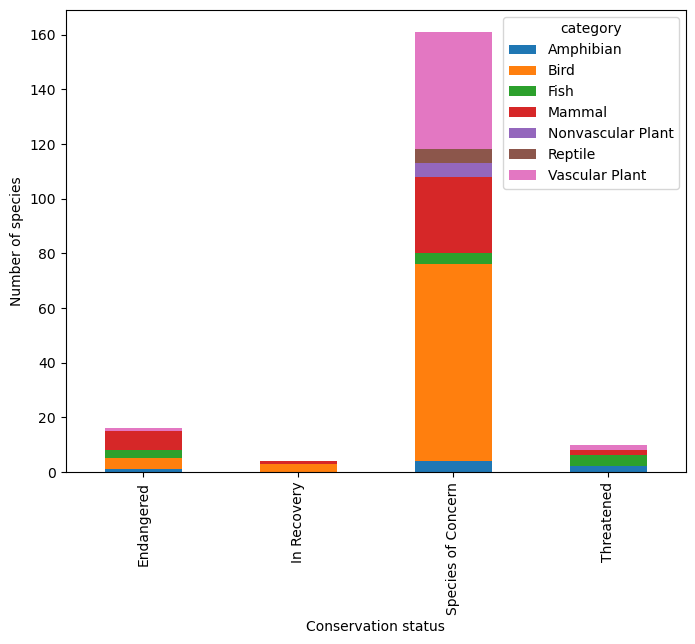

In [14]:
conservation_category.plot(kind= "bar", figsize=(8,6), stacked=True)
plt.xlabel("Conservation status")
plt.ylabel("Number of species")

In [15]:
species["protected"] = species["conservation_status"] != "No Intervention"

In [16]:
category_counts = species.groupby(["category", "protected"]).scientific_name.nunique()\
    .reset_index().pivot(columns="protected", index="category", values="scientific_name").reset_index()
category_counts.columns = ["category", "protected", "not_protected"]
category_counts

,category,protected,not_protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [17]:
category_counts["protected_percent"] = category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100 
category_counts

,category,protected,not_protected,protected_percent
0,Amphibian,72,7,91.139241
1,Bird,413,75,84.631148
2,Fish,115,11,91.269841
3,Mammal,146,30,82.954545
4,Nonvascular Plant,328,5,98.498498
5,Reptile,73,5,93.589744
6,Vascular Plant,4216,46,98.920695


In [18]:
observations["category"] = species.category
observations.fillna("No Intervention", inplace=True)
category_parks = observations.groupby(["category", "park_name"]).observations.sum()\
    .reset_index().pivot(columns="park_name", index="category", values="observations").reset_index()
category_parks.columns = ["category", "Bryce National Park", "Great Smoky Mountains National Park", "Yellowstone National Park", "Yosemite National Park"]
category_parks

,category,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
0,Amphibian,1446,962,5981,3866
1,Bird,12944,9310,34285,18207
2,Fish,3211,3034,6899,3823
3,Mammal,5320,4231,11182,7961
4,No Intervention,430156,326583,1075765,650154
5,Nonvascular Plant,7585,6977,24499,9602
6,Reptile,2248,1171,4110,3351
7,Vascular Plant,113115,79552,280841,166368


Text(0, 0.5, 'number of species')

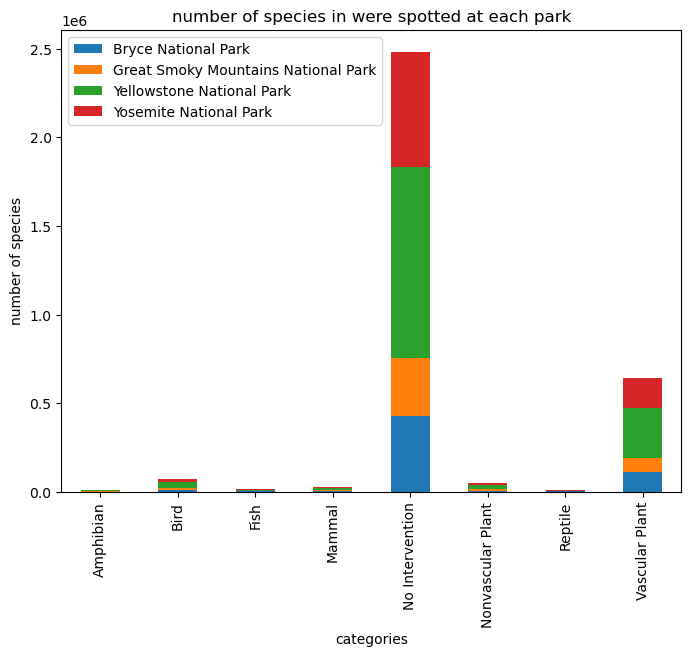

In [22]:
category_parks.plot(x= "category", kind='bar', stacked=True, figsize=(8, 6))
plt.title("number of species in were spotted at each park")
plt.xlabel("categories")
plt.ylabel("number of species")